In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Objectives of EDA - Part 1:
* Identify keywords in course titles using a WordCloud
* Calculate the summary statistics and visualizations of the online course content dataset
* Determine popular course genres
* Calculate the summary statistics and create visualizations of the online course enrollment dataset
* Identify courses with the greatest number of enrolled students

In [3]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [4]:
# paths to dataset from a source on the cloud (note: this dataset is shared part of Coursera's certification Learning)
# list of courses
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
# ratings of courses
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [5]:
#load the datasets
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [23]:
# check features/column names from course dataset
course_df.columns
# obsrevation: course genres are some popular topics related to a course

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [ ]:
# check data size
course_df.shape

In [ ]:
# number of unique courses in the dataset
course_df.shape[0]

In [ ]:
# check the data types of each feature
course_df.dtypes
# observation: datatype for all genres is int64

In [ ]:
# review sample course rows
course_df.head()
# observation: each topic value is either 1 or 0 based it's relativity to a course offering, 
# no additional need for any data encoding

In [ ]:
#First, let's join all the title values into one string, 
# then we can conveniently get a wordcloud from the big string:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [ ]:
titles

In [ ]:
# initialize Stopwords which are used to filter common stop words and some less meaningful words
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [ ]:
#create a ```WordCloud``` object and generate ```wordcloud``` from the titles
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)

In [ ]:
# let's visualize the words
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see from the ```wordcloud``` printed above,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. these keywords provide a general understanding that the courses in the dataset are focused on demanding IT skills.

In [ ]:
# now let's us take a look at the freueqncy of courses
cols = [col for col in course_df.columns if col not in ['COURSE_ID', 'TITLE']]
cs_counts_df = course_df[cols]

In [ ]:
# generate genres from the filtered dataset above
course_df[cols].sum(axis=0)
genres = pd.DataFrame(course_df[cols].sum(axis=0), columns = ['Count']).sort_values(by = "Count", ascending=False)
genres

In [ ]:
# let's see the above size data on a bar plot
sns.set_theme(rc={'figure.figsize':(25,6)})
sns.barplot(x=genres.index, y="Count", data=genres)

With courses data analysis completed above, now let's review ratings dataset

In [ ]:
ratings_df.head()
# observation: each course had a rating given by one user and/or more users.

In [ ]:
ratings_df['rating'].unique()
# on rating data: The rating column contains one of two values: 2 means the user just audited 
# the course without completing it and 3 means the user completed the course and earned a certificate.
# Two other possible values are not explicitly available in this project: 0 or NA means 
# the user has no interaction with the course and 1 means the user just browsed the course.

In [ ]:
ratings_df.shape[0]

In [14]:
# find the rating counts for each user:
agg_user_ratings_df = ratings_df.groupby('user').size().reset_index(name='ratings').sort_values(by='ratings', ascending=False).reset_index(drop=True)
agg_user_ratings_df.describe
# observation: as mentioned above, each user rated one or more courses

<bound method NDFrame.describe of           user  ratings
0            2       61
1            5       59
2       924030       51
3      1653994       51
4      1761291       50
...        ...      ...
33896   891557        1
33897   892174        1
33898   892298        1
33899   892496        1
33900  2103039        1

[33901 rows x 2 columns]>

In [6]:
# find the rating counts for each user:
# find the rating counts for each user:
agg_items_users_df = ratings_df.groupby('item').size().reset_index(name='enrollments').sort_values(by='enrollments', ascending=False).reset_index(drop=True)
agg_items_users_df.describe
# observation: as mentioned above, each user rated one or more courses

<bound method NDFrame.describe of            item  enrollments
0      PY0101EN        14936
1      DS0101EN        14477
2      BD0101EN        13291
3      BD0111EN        10599
4      DA0101EN         8303
..          ...          ...
121    ST0201EN            1
122    ST0301EN            1
123    DX0106EN            1
124    DX0108EN            1
125  GPXX0QR3EN            1

[126 rows x 2 columns]>

In [133]:
len(agg_user_ratings_df)

33901

<Axes: title={'center': 'Top 20 Course Enrollments'}>

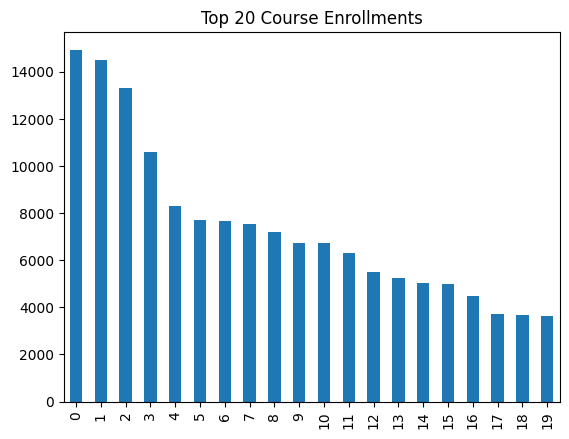

In [11]:
agg_items_users_df.enrollments.nlargest(20).plot(kind='bar', align='center', title='Top 20 Course Enrollments')

In [20]:
agg_user_ratings_df.nlargest(20, columns='ratings')

,user,ratings
0,2,61
1,5,59
2,924030,51
3,1653994,51
4,1761291,50
5,1559851,50
6,382781,50
7,746163,50
8,971917,50
9,1445103,49


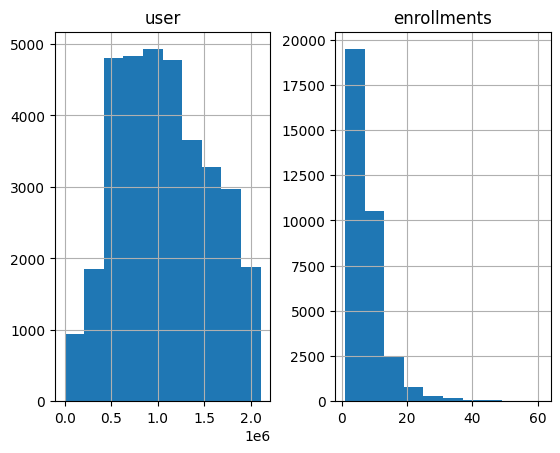

In [90]:
# Note that you can let the hist function do the groupby
# the function hist returns the list of axes created
axarr = agg_user_ratings_df.hist()

In [29]:
agg_items_users_df.describe

<bound method NDFrame.describe of            item  enrollments
0      PY0101EN        14936
1      DS0101EN        14477
2      BD0101EN        13291
3      BD0111EN        10599
4      DA0101EN         8303
..          ...          ...
121    ST0201EN            1
122    ST0301EN            1
123    DX0106EN            1
124    DX0108EN            1
125  GPXX0QR3EN            1

[126 rows x 2 columns]>

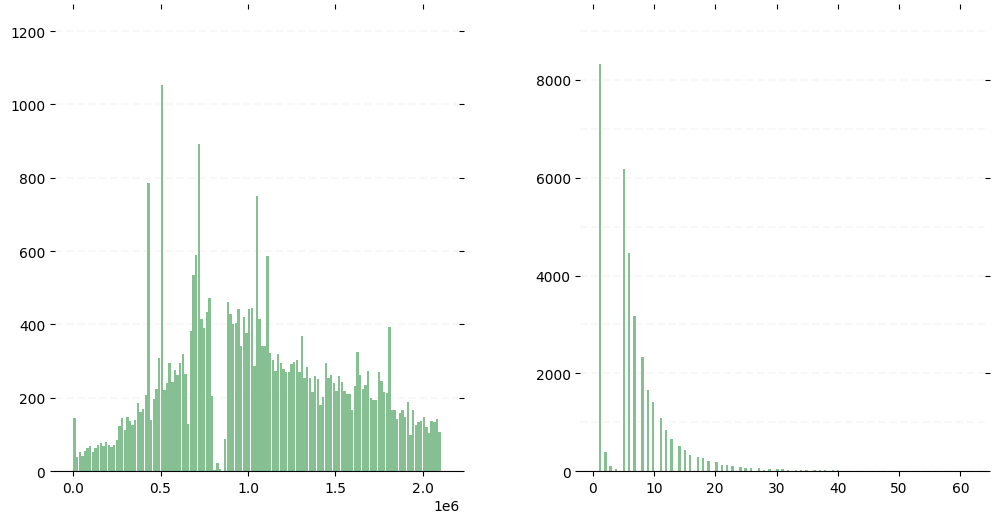

In [30]:
ax = agg_user_ratings_df.hist(bins=139, grid=False, figsize=(12,6), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    #x.set_xlabel("Enrollments", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    #x.set_ylabel("User", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


as you see above ratings dataset doesn't have course titles to what type of course. To make it more clear, we need to join the course titles in the course metadata dataset so that we can identify what the most popular courses are immediately:

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

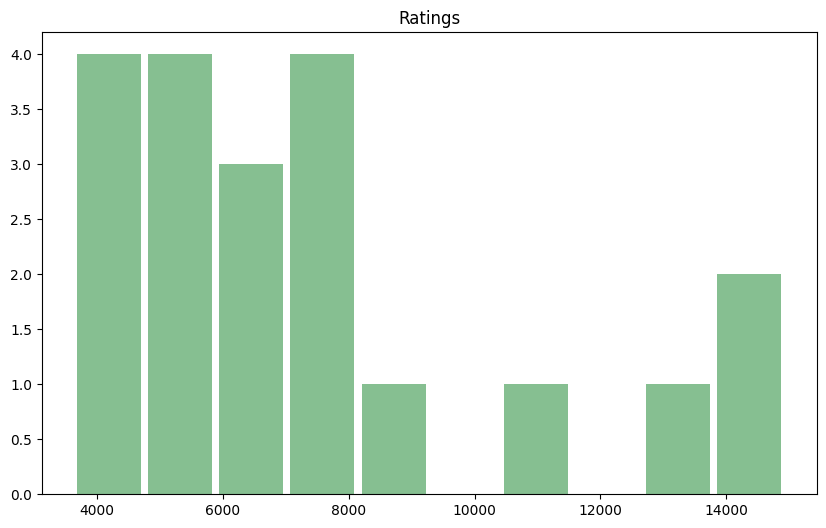

In [37]:
itm_ratings_df = ratings_df.groupby('item').size().reset_index(name='Ratings').sort_values(by='Ratings', ascending=False).reset_index(drop=True)
#itm_ratings_df
top_20_df = itm_ratings_df.nlargest(20, 'Ratings')
ax = top_20_df.hist(grid=False, figsize=(10,6), color='#86bf91', zorder=2, rwidth=0.9)

x= ax[0]

# Set x-axis label
x.set_xlabel("Enrollments", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Course Index", labelpad=20, weight='bold', size=12)



In [24]:
#merged_df = pd.merge(course_df[['COURSE_ID','TITLE']], agg_user_ratings_df[['user','ratings']], how='right', left_on='user', right_on='user')
merged_df = pd.merge(course_df[['COURSE_ID','TITLE']], agg_items_users_df[['item','enrollments']], how='right', left_on='COURSE_ID', right_on='item')
merged_df

,COURSE_ID,TITLE,item,enrollments
0,PY0101EN,python for data science,PY0101EN,14936
1,DS0101EN,introduction to data science,DS0101EN,14477
2,BD0101EN,big data 101,BD0101EN,13291
3,BD0111EN,hadoop 101,BD0111EN,10599
4,DA0101EN,data analysis with python,DA0101EN,8303
...,...,...,...,...
121,ST0201EN,statistics 201,ST0201EN,1
122,ST0301EN,statistics 301,ST0301EN,1
123,DX0106EN,data science bootcamp with r for university pr...,DX0106EN,1
124,DX0108EN,data science bootcamp with python for universi...,DX0108EN,1


In [27]:
new_df = merged_df[['COURSE_ID','TITLE', 'enrollments']].copy()
#titles_ratings_df = new_df.groupby('COURSE_ID').size().reset_index(name='Enrollments').sort_values(by='Enrollments', ascending=False)
top_20_with_titles_df = new_df.nlargest(20, 'enrollments')
top_20_with_titles_df

,COURSE_ID,TITLE,enrollments
0,PY0101EN,python for data science,14936
1,DS0101EN,introduction to data science,14477
2,BD0101EN,big data 101,13291
3,BD0111EN,hadoop 101,10599
4,DA0101EN,data analysis with python,8303
5,DS0103EN,data science methodology,7719
6,ML0101ENv3,machine learning with python,7644
7,BD0211EN,spark fundamentals i,7551
8,DS0105EN,data science hands on with open source tools,7199
9,BC0101EN,blockchain essentials,6719


End of EDA - Part 1 and start of EDA - Part 2: Bag of Words (in the next notebook)